In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yt
%matplotlib notebook

## No potential - 1D density profile

#### To swap between no potentail and quadratic potential change prescribe_grav_potential.cpp line 35 and inputs line 122.  

yt : [INFO     ] 2019-05-20 11:35:03,522 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-20 11:35:03,523 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:35:03,523 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:35:03,526 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:35:03,555 Parameters: current_time              = 2.01941151592212
yt : [INFO     ] 2019-05-20 11:35:03,556 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:35:03,559 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:35:03,562 Parameters: domain_right_edge         = [1. 1. 1.]


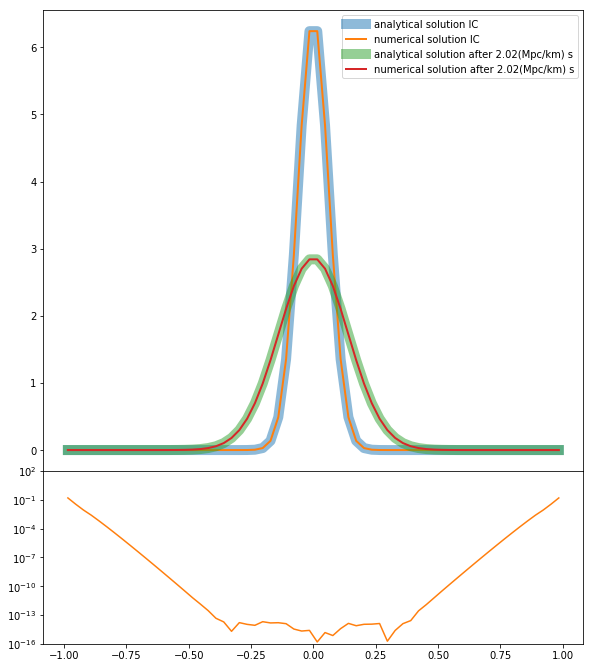

In [13]:
ds = yt.load("plt_gauss_no_gravity_igp00000")
ds2 = yt.load("plt_gauss_no_gravity_igp00100")
ad = ds.all_data()
ad2 = ds2.all_data()
list1 = ad[("boxlib","AxDens")]
list2 = ad2[("boxlib","AxDens")]
time1 = ds.current_time
time2 = ds2.current_time
del_t = float(time2 - time1)
xlo = ds.domain_left_edge[0]
xhi = ds.domain_right_edge[0]
boxsize = float(xhi - xlo)
N=int(int(len(list1))**(1/3)+0.5)

gamma =0.01917152/2.5
sigmaR = 0.05

hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0

density1 = np.zeros((N,N,N))
density2 = np.zeros((N,N,N))

for i in range(0, N):
    for j in range(0, N):
        for k in range(0, N):
            density1[i,j,k]=list1[N*(N*i+k)+j]
            density2[i,j,k]=list2[N*(N*i+k)+j]
x_range = np.arange(float(xlo)+0.5*float(boxsize/N), float(xhi)+0.5*float(boxsize/N), float(boxsize/N))
            
## Analytical solution - no potential 
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x_range]
ana_dens2 = [np.sqrt(omega/np.pi/hbaroverm/(1+(del_t*omega)**2))*np.exp(-(x-igp)**2*omega/gamma/(1+(del_t*omega)**2))   for x in x_range]

fig = plt.figure()
left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x_range, ana_dens, linewidth=10, alpha=0.5, label="analytical solution IC")
topplot.plot(x_range, density1[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution IC")
botplot.plot(x_range, abs(density1[:,int(N/2),int(N/2)]-ana_dens)/ana_dens)

topplot.plot(x_range, ana_dens2, '-', linewidth=10, alpha=0.5, label="analytical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
topplot.plot(x_range, density2[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
botplot.plot(x_range, abs(density2[:,int(N/2),int(N/2)]-ana_dens2)/ana_dens2)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc =1)
plt.show()


## Quadratic potential - 1D density profile

yt : [INFO     ] 2019-05-20 11:21:23,162 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-20 11:21:23,163 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:21:23,164 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:21:23,167 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:21:23,193 Parameters: current_time              = 3.13309436497253
yt : [INFO     ] 2019-05-20 11:21:23,194 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:21:23,199 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:21:23,202 Parameters: domain_right_edge         = [1. 1. 1.]


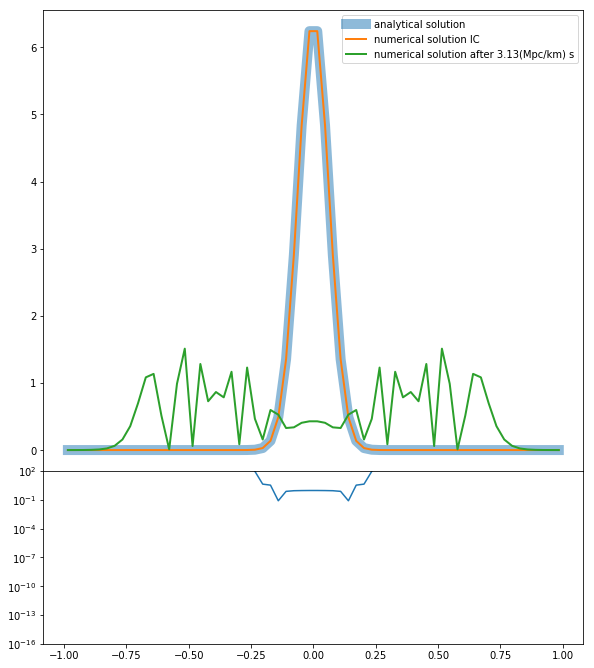

In [10]:
ds = yt.load("plt_gauss_quadpot00000")
ds2 = yt.load("plt_gauss_quadpot00200")
ad = ds.all_data()
ad2 = ds2.all_data()
list1 = ad[("boxlib","AxDens")]
list2 = ad2[("boxlib","AxDens")]
time1 = ds.current_time
time2 = ds2.current_time
del_t = float(time2 - time1) 
xlo = ds.domain_left_edge[0]
xhi = ds.domain_right_edge[0]
boxsize = float(xhi - xlo)
N=int(int(len(list1))**(1/3)+0.5)

hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0

density1 = np.zeros((N,N,N))
density2 = np.zeros((N,N,N))

for i in range(0, N):
    for j in range(0, N):
        for k in range(0, N):
            density1[i,j,k]=list1[N*(N*i+k)+j]
            density2[i,j,k]=list2[N*(N*i+k)+j]
x_range = np.arange(float(xlo)+0.5*float(boxsize/N), float(xhi)+0.5*float(boxsize/N), float(boxsize/N))
            
## Analytical solution - quadtratic potential 
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x_range]


fig = plt.figure()
left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x_range, ana_dens, linewidth=10, alpha=0.5, label="analytical solution")
topplot.plot(x_range, density1[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution IC")
topplot.plot(x_range, density2[:,int(N/2),int(N/2)], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")

botplot.plot(x_range, abs(density2[:,int(N/2),int(N/2)]-ana_dens)/ana_dens)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc=1)
plt.show()

## Deviation from the analytical solution in the center with time 

yt : [INFO     ] 2019-05-20 11:14:08,242 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-20 11:14:08,244 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:08,246 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:14:08,247 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:14:08,418 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-20 11:14:08,419 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:08,420 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:14:08,420 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:14:08,596 Parameters: current_time              = 0.125778925355488
yt : [INFO     ] 2019-05-20 11:14:08,597 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:08,598 Parameters: domain_left_edge          = 

yt : [INFO     ] 2019-05-20 11:14:12,940 Parameters: current_time              = 3.29137412495238
yt : [INFO     ] 2019-05-20 11:14:12,941 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:12,942 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:14:12,943 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:14:13,134 Parameters: current_time              = 3.44965388493222
yt : [INFO     ] 2019-05-20 11:14:13,134 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:13,135 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:14:13,136 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:14:13,379 Parameters: current_time              = 3.60793364491207
yt : [INFO     ] 2019-05-20 11:14:13,380 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:13,383 Parameters: dom

yt : [INFO     ] 2019-05-20 11:14:17,381 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:14:17,548 Parameters: current_time              = 6.77352884450896
yt : [INFO     ] 2019-05-20 11:14:17,549 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:17,550 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:14:17,552 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:14:17,861 Parameters: current_time              = 6.9318086044888
yt : [INFO     ] 2019-05-20 11:14:17,862 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-20 11:14:17,863 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-20 11:14:17,864 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-20 11:14:18,035 Parameters: current_time              = 7.09008836446865
yt : [INFO     ] 2019-05-20 11:14:18,036 Parameters: doma

Text(0, 0.5, '(dens(centre)-analytical)/analytical')

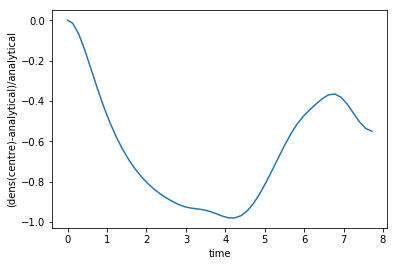

In [6]:
ds = yt.load("plt_gauss_quadpot00000")
ad = ds.all_data()
list0 = ad[("boxlib","AxDens")]
time0 = ds.current_time
xlo = ds.domain_left_edge[0]
xhi = ds.domain_right_edge[0]
boxsize = float(xhi - xlo)
N=int(int(len(list0))**(1/3)+0.5)
    
hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0

## Analytical solution - quadtratic potential 
x_range = np.arange(float(xlo)+0.5*float(boxsize/N), float(xhi)+0.5*float(boxsize/N), float(boxsize/N))
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x_range]

list_snshots =np.arange(0,500,10)
times=[] 
center_diffs=[]

for s in list_snshots:
    ds = yt.load("plt_gauss_quadpot00"+str(s).zfill(3))
    ad = ds.all_data()
    list1 = ad[("boxlib","AxDens")]
    time1 = ds.current_time
    times.append(float(time1 - time0)) 


    density1 = np.zeros((N,N,N))

#     for i in range(0, N):
#         for j in range(0, N):
#             for k in range(0, N):
#                 density1[i,j,k]=list1[N*(N*i+k)+j]
            
    center_diffs.append((list1[N*(N*int(N/2)+int(N/2))+int(N/2)]-ana_dens[int(N/2)])/ana_dens[int(N/2)])

fig = plt.figure()
plt.plot(times, center_diffs)
plt.xlabel('time')
plt.ylabel('(dens(centre)-analytical)/analytical')